In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
#base dataset
data = pd.read_csv("data-final.csv")
#remove entries at IP addresses from which multiple responses were sent
data = data[data['IPC'] == 1].dropna()
#remove country-less entries
data = data[data['country'] != 'NONE']
#responses only
R = data.loc[:,'EXT1':'OPN10']
R = R.astype('int')
for col in R.columns:
    R = R[R[col] != 0]
    data = data[data[col] != 0]
#segments
EXT = R.loc[:,'EXT1':'EXT10']
EST = R.loc[:,'EST1':'EST10']
AGR = R.loc[:,'AGR1':'AGR10']
CSN = R.loc[:,'CSN1':'CSN10']
OPN = R.loc[:,'OPN1':'OPN10']
print(R.shape)

(594453, 50)


In [2]:
#values per country
result = data['country'].value_counts()
print(result[:10])

US    300493
GB     43411
CA     38337
AU     30302
DE     10895
IN      9847
PH      9470
MX      8275
NO      7137
NL      6910
Name: country, dtype: int64


<AxesSubplot:>

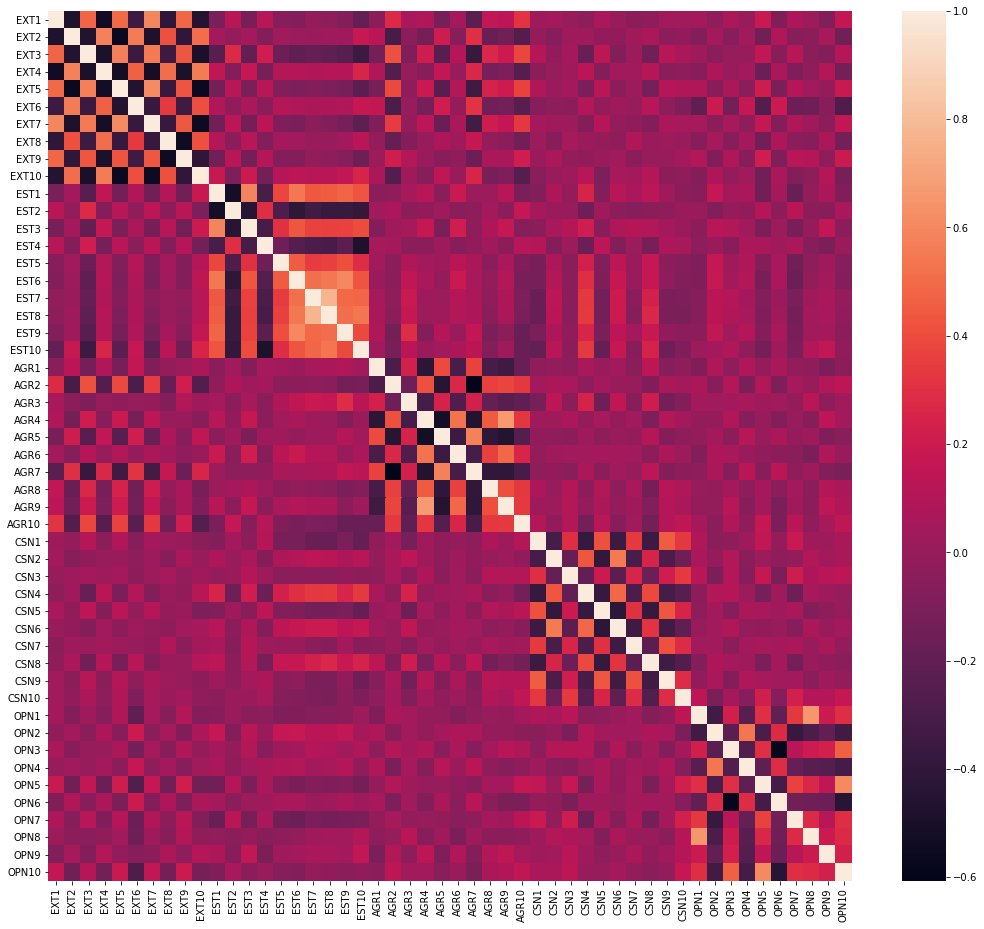

In [3]:
#correlation heatmap for all questions
plt.figure(figsize=(18,16))
sns.heatmap(R.corr())

In [4]:
#correlation comparison between variables within the same category vs different catagories
corr = R.corr().to_numpy()
in_cat = 0
in_catc = 0
out_cat = 0
out_catc = 0

for i in range(len(corr)):
    for j in range(i):
        if (j//10) == (i//10) and (i!=j):
            in_cat += abs(corr[i][j])
            in_catc += 1
        elif (i!=j):
            out_cat += abs(corr[i][j])
            out_catc += 1

print(f"in cat avg = {in_cat/in_catc}")
print(f"out cat avg = {out_cat/out_catc}")

in cat avg = 0.36719921611602413
out cat avg = 0.08496620283003829


<AxesSubplot:>

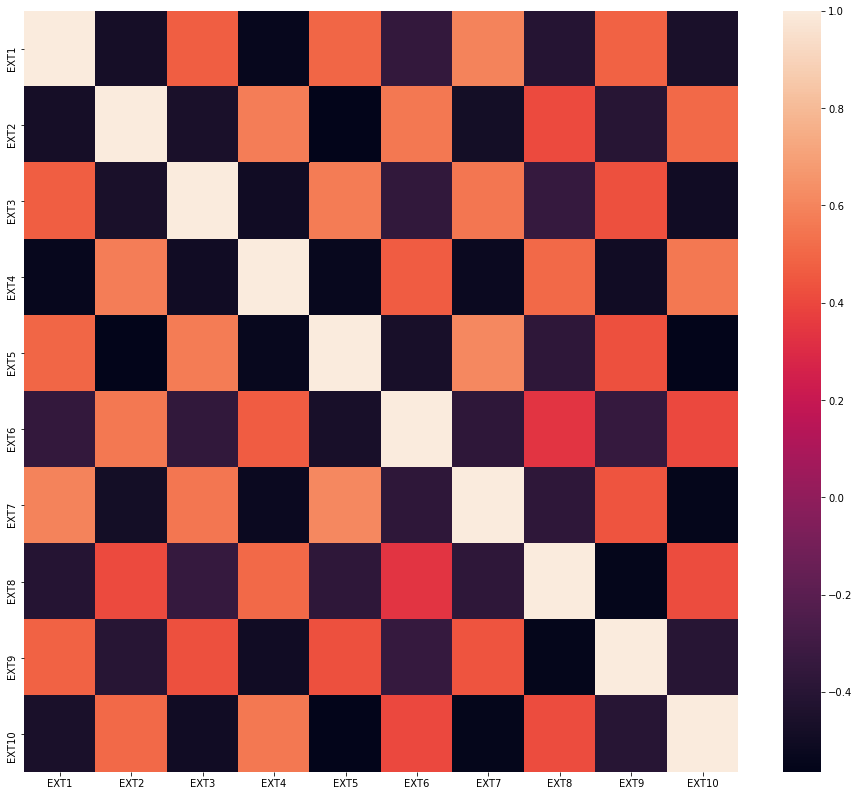

In [5]:
#EXT - extraversion correlation heatmap
plt.figure(figsize=(16,14))
sns.heatmap(EXT.corr())

<AxesSubplot:>

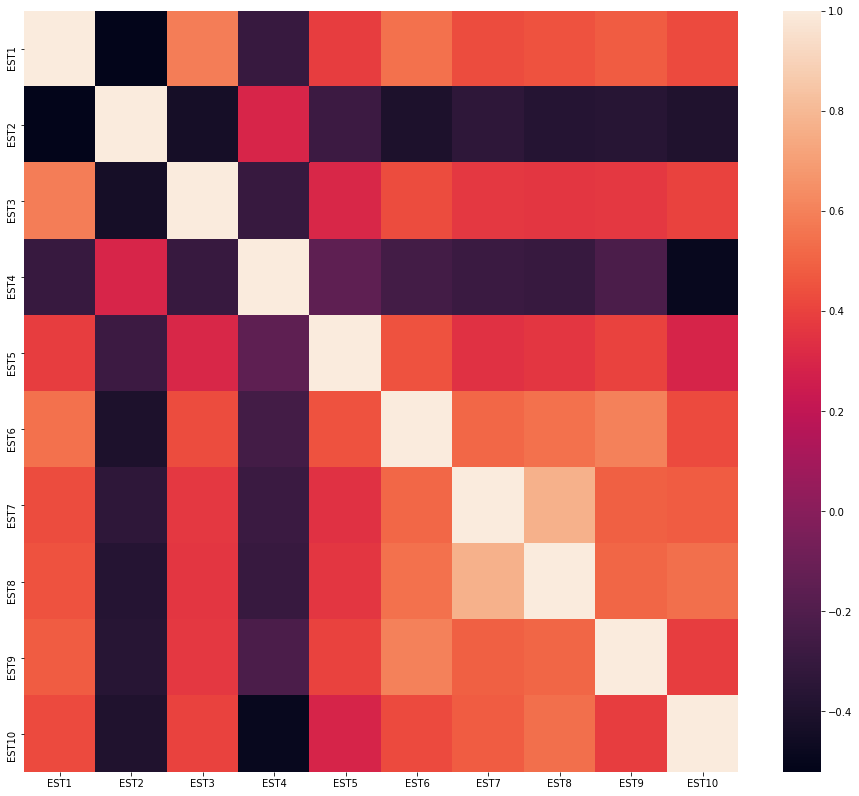

In [6]:
#EST - emotional stability correlation heatmap
plt.figure(figsize=(16,14))
sns.heatmap(EST.corr())

<AxesSubplot:>

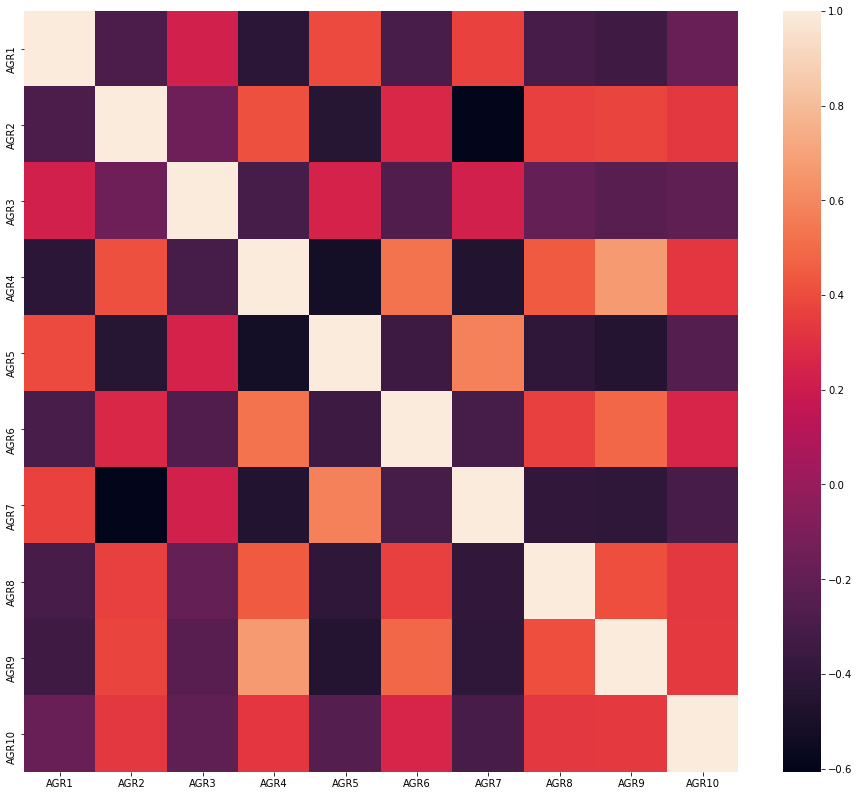

In [7]:
#AGR - agreeableness correlation heatmap
plt.figure(figsize=(16,14))
sns.heatmap(AGR.corr())

<AxesSubplot:>

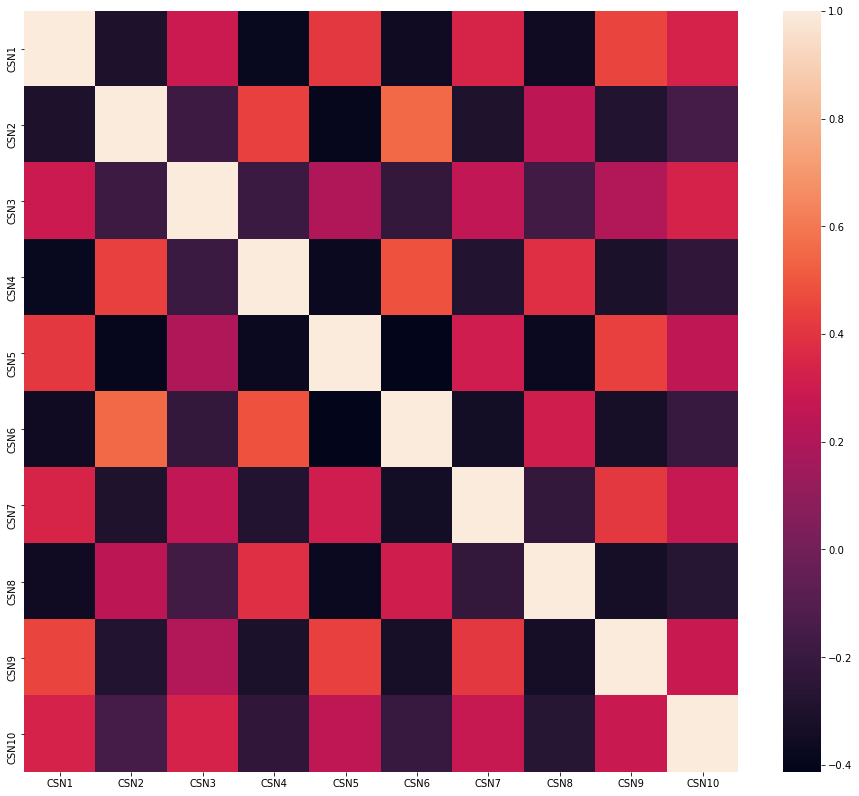

In [8]:
#CSN - conscientiousness correlation heatmap
plt.figure(figsize=(16,14))
sns.heatmap(CSN.corr())

<AxesSubplot:>

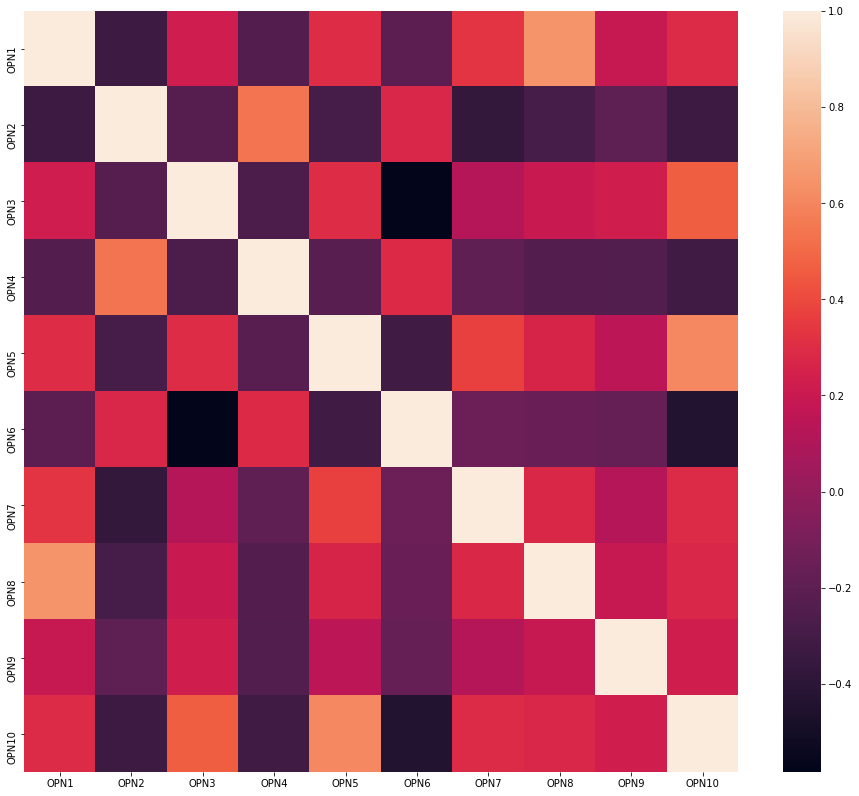

In [9]:
#OPN - Openness (to experience) correlation heatmap
plt.figure(figsize=(16,14))
sns.heatmap(OPN.corr())

In [12]:
#printout average response from each of the 10 most respondent countries
cos = ['US','GB','CA','AU','DE','IN','PH','MX','NO','NL']
results = []
for co in cos:
    subset = data[data['country'] == co]
    subset = subset.loc[:,'EXT1':'OPN10']
    avgs = []
    for col in subset.columns:
        avgs.append(subset[col].mean())
    results.append(avgs)

for j in range(len(results[0])):
    print(f'{subset.columns[j]}: ',end=' ')
    mn = results[0][j]
    mx = results[0][j]
    for i in range(len(results)):
        if results[i][j] < mn:
            mn = results[i][j]
        if results[i][j] > mx:
            mx = results[i][j]
        print(f'{results[i][j]:.1f}',end='  ')
    print(f' --- spread = {mx-mn:.2f}',end=' ')
    print('')

EXT1:  2.6  2.6  2.6  2.6  2.4  2.7  2.5  2.6  2.7  2.7   --- spread = 0.36 
EXT2:  2.8  2.8  2.8  2.8  2.9  3.0  2.9  2.9  2.7  2.7   --- spread = 0.26 
EXT3:  3.3  3.2  3.2  3.3  3.1  3.3  3.2  3.1  3.3  3.4   --- spread = 0.34 
EXT4:  3.2  3.2  3.2  3.2  3.3  3.3  3.4  3.2  3.1  3.1   --- spread = 0.39 
EXT5:  3.3  3.3  3.3  3.3  3.0  3.2  3.2  3.2  3.4  3.4   --- spread = 0.35 
EXT6:  2.4  2.4  2.4  2.4  2.4  2.7  2.9  2.6  2.3  2.3   --- spread = 0.65 
EXT7:  2.8  2.7  2.7  2.8  2.5  2.7  2.5  2.6  2.9  2.9   --- spread = 0.45 
EXT8:  3.5  3.5  3.5  3.5  3.4  3.2  3.4  3.2  3.3  3.3   --- spread = 0.33 
EXT9:  2.9  2.9  3.0  2.9  2.9  3.3  2.9  3.2  3.0  3.0   --- spread = 0.43 
EXT10:  3.6  3.6  3.7  3.6  3.6  3.6  4.0  3.6  3.4  3.3   --- spread = 0.63 
EST1:  3.4  3.3  3.3  3.3  3.0  3.2  3.3  3.5  3.0  3.0   --- spread = 0.50 
EST2:  3.2  3.1  3.2  3.2  3.2  3.3  3.2  3.0  3.3  3.4   --- spread = 0.34 
EST3:  3.9  3.9  3.9  3.8  3.9  3.7  4.0  4.0  3.6  3.7   --- spread = 0.38

In [ ]:
#results paste
#country:US   GB   CA   AU   DE   IN   PH   MX   NO   NL
# EXT1:  2.6  2.6  2.6  2.6  2.4  2.7  2.5  2.6  2.7  2.7   --- spread = 0.36 
# EXT2:  2.8  2.8  2.8  2.8  2.9  3.0  2.9  2.9  2.7  2.7   --- spread = 0.26 
# EXT3:  3.3  3.2  3.2  3.3  3.1  3.3  3.2  3.1  3.3  3.4   --- spread = 0.34 
# EXT4:  3.2  3.2  3.2  3.2  3.3  3.3  3.4  3.2  3.1  3.1   --- spread = 0.39 
# EXT5:  3.3  3.3  3.3  3.3  3.0  3.2  3.2  3.2  3.4  3.4   --- spread = 0.35 
# EXT6:  2.4  2.4  2.4  2.4  2.4  2.7  2.9  2.6  2.3  2.3   --- spread = 0.65 
# EXT7:  2.8  2.7  2.7  2.8  2.5  2.7  2.5  2.6  2.9  2.9   --- spread = 0.45 
# EXT8:  3.5  3.5  3.5  3.5  3.4  3.2  3.4  3.2  3.3  3.3   --- spread = 0.33 
# EXT9:  2.9  2.9  3.0  2.9  2.9  3.3  2.9  3.2  3.0  3.0   --- spread = 0.43 
#EXT10:  3.6  3.6  3.7  3.6  3.6  3.6  4.0  3.6  3.4  3.3   --- spread = 0.63 
# EST1:  3.4  3.3  3.3  3.3  3.0  3.2  3.3  3.5  3.0  3.0   --- spread = 0.50 
# EST2:  3.2  3.1  3.2  3.2  3.2  3.3  3.2  3.0  3.3  3.4   --- spread = 0.34 
# EST3:  3.9  3.9  3.9  3.8  3.9  3.7  4.0  4.0  3.6  3.7   --- spread = 0.38 
# EST4:  2.6  2.5  2.6  2.7  2.7  2.8  2.8  2.9  2.7  2.7   --- spread = 0.37 
# EST5:  2.7  3.0  2.8  2.9  3.0  3.1  3.3  3.0  3.2  2.9   --- spread = 0.63 
# EST6:  2.8  2.9  2.8  2.9  2.8  3.1  3.2  3.1  2.8  2.6   --- spread = 0.53 
# EST7:  3.0  3.2  3.0  3.0  3.0  3.3  3.4  3.2  2.9  2.9   --- spread = 0.49 
# EST8:  2.6  2.8  2.6  2.6  2.7  3.0  3.1  3.0  2.6  2.6   --- spread = 0.51 
# EST9:  3.1  3.3  3.1  3.1  2.9  3.1  3.3  3.1  3.0  2.9   --- spread = 0.43 
#EST10:  2.8  3.0  2.9  2.8  2.9  2.9  3.1  3.0  2.8  2.7   --- spread = 0.36 
# AGR1:  2.0  2.2  2.1  2.1  2.4  3.0  3.1  3.0  2.2  2.3   --- spread = 1.04 
# AGR2:  3.9  3.9  3.9  3.9  3.7  3.8  3.8  3.6  3.9  3.9   --- spread = 0.29 
# AGR3:  2.2  2.5  2.3  2.3  2.3  2.1  2.5  2.4  2.1  2.2   --- spread = 0.44 
# AGR4:  4.0  3.9  4.0  4.0  3.7  4.0  3.9  3.8  4.0  3.9   --- spread = 0.29 
# AGR5:  2.2  2.3  2.3  2.3  2.4  2.4  2.5  2.5  2.2  2.2   --- spread = 0.26 
# AGR6:  3.8  3.6  3.8  3.8  3.6  3.9  4.0  3.7  3.7  3.7   --- spread = 0.41 
# AGR7:  2.1  2.2  2.2  2.2  2.4  2.4  2.4  2.4  2.2  2.2   --- spread = 0.30 
# AGR8:  3.8  3.6  3.7  3.7  3.5  3.6  3.6  3.4  3.5  3.7   --- spread = 0.35 
# AGR9:  3.8  3.7  3.8  3.8  3.6  4.0  3.9  3.7  3.8  3.8   --- spread = 0.37 
#AGR10:  3.6  3.5  3.6  3.6  3.4  3.8  3.5  3.6  3.6  3.7   --- spread = 0.41 
# CSN1:  3.4  3.2  3.4  3.3  3.2  3.2  3.3  3.2  3.3  3.3   --- spread = 0.23 
# CSN2:  3.0  3.0  3.0  3.0  3.1  2.8  2.7  3.1  2.9  2.9   --- spread = 0.40 
# CSN3:  4.1  3.9  4.0  3.9  4.0  4.0  4.0  4.0  4.0  4.0   --- spread = 0.12 
# CSN4:  2.6  2.8  2.6  2.6  2.7  2.6  2.9  3.0  2.4  2.7   --- spread = 0.59 
# CSN5:  2.6  2.4  2.5  2.6  2.4  2.9  3.0  2.8  2.6  2.6   --- spread = 0.60 
# CSN6:  2.8  2.9  2.8  2.8  2.9  2.9  3.1  3.3  2.8  2.8   --- spread = 0.50 
# CSN7:  3.8  3.7  3.8  3.8  3.6  3.5  3.7  3.7  3.8  3.6   --- spread = 0.34 
# CSN8:  2.4  2.5  2.5  2.4  2.9  2.5  2.7  2.9  2.6  2.7   --- spread = 0.49 
# CSN9:  3.3  2.9  3.2  3.1  2.9  3.0  3.5  2.9  3.0  2.9   --- spread = 0.61 
#CSN10:  3.7  3.5  3.7  3.6  3.6  3.6  3.5  3.6  3.6  3.6   --- spread = 0.17 
# OPN1:  3.8  3.9  3.8  3.8  4.1  3.4  3.3  3.7  4.0  4.0   --- spread = 0.78 
# OPN2:  2.0  2.0  2.0  2.1  1.7  2.2  2.5  2.3  1.9  2.0   --- spread = 0.79 
# OPN3:  4.1  4.1  4.1  4.0  4.2  4.1  4.0  4.2  4.0  4.1   --- spread = 0.20 
# OPN4:  1.9  2.0  1.9  2.0  1.7  2.0  2.2  2.1  2.0  1.9   --- spread = 0.56 
# OPN5:  3.9  3.7  3.9  3.8  3.8  3.9  3.6  3.8  3.7  3.8   --- spread = 0.25 
# OPN6:  1.9  1.9  1.9  2.0  1.8  1.8  2.0  1.9  1.9  1.8   --- spread = 0.20 
# OPN7:  4.1  4.0  4.1  4.0  4.2  4.1  3.8  4.0  4.2  4.2   --- spread = 0.37 
# OPN8:  3.3  3.5  3.3  3.3  3.7  2.8  2.8  3.1  3.4  3.4   --- spread = 0.89 
# OPN9:  4.2  4.2  4.3  4.2  4.4  3.9  4.0  4.2  4.4  4.1   --- spread = 0.42 
#OPN10:  4.1  3.9  4.0  3.9  4.0  4.0  3.9  4.1  3.8  4.0   --- spread = 0.24 